# STC Jawwy

In [194]:
!pip install pyxlsb
!pip install pandas --upgrade
!pip install openpyxl

In [195]:
import pandas as pd
import pyxlsb
import seaborn as sns
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Jawwy dataset
The dataset includes total watching hours for customers per day.

You are required to work on predecting the forecast for the watching hours.

In [196]:
dataframe = pd.read_excel('/content/stc TV Data Set_T2 .xlsx', engine='openpyxl')

In [197]:
dataframe.head()

,Unnamed: 0,date_,Total_watch_time_in_houres
0,0,2018-01-01,1123.551944
1,1,2018-01-02,1000.129722
2,2,2018-01-03,881.924444
3,3,2018-01-04,782.669444
4,4,2018-01-05,1051.939444


In [198]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  86 non-null     int64         
 1   date_                       86 non-null     datetime64[ns]
 2   Total_watch_time_in_houres  86 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 KB


In [199]:
dataframe.shape

(86, 3)

In [200]:
dataframe.describe()

,Unnamed: 0,date_,Total_watch_time_in_houres
count,86.000000,86,86.000000
mean,42.500000,2018-02-28 17:01:23.720930304,780.817926
min,0.000000,2018-01-01 00:00:00,562.124722
25%,21.250000,2018-01-30 06:00:00,707.709653
50%,42.500000,2018-02-28 12:00:00,763.181389
75%,63.750000,2018-03-29 18:00:00,840.985278
max,85.000000,2018-04-30 00:00:00,1123.551944
std,24.969982,NaN,122.992002


In [201]:
dataframe.isnull().any()

Unnamed: 0                    False
date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [202]:
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.dates import DateFormatter

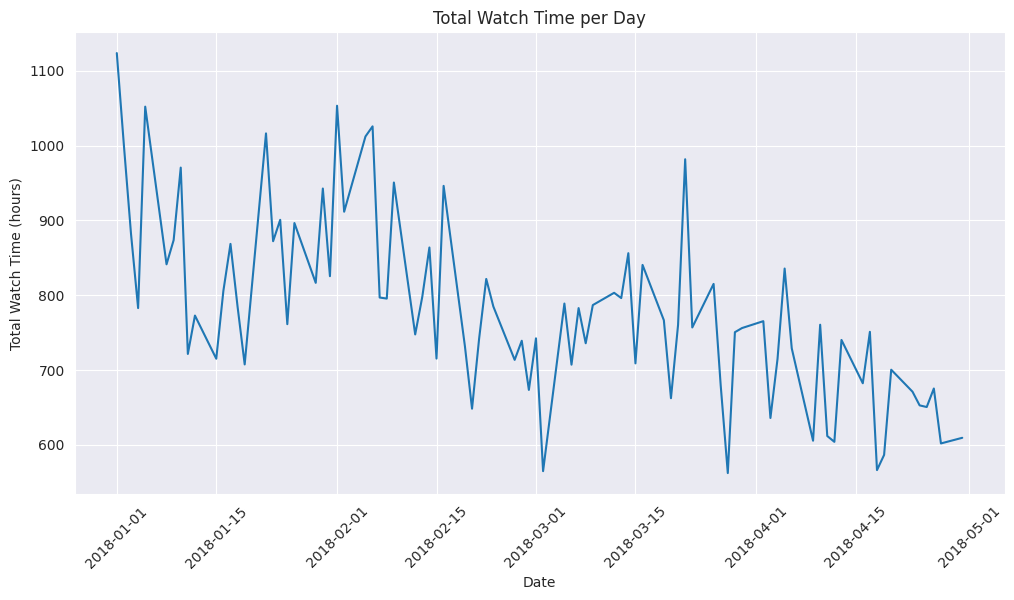

In [203]:
dataframe["date_"] = pd.to_datetime(dataframe["date_"])


daily_watch_time = dataframe.groupby("date_")["Total_watch_time_in_houres"].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_watch_time.index, daily_watch_time.values)
plt.xlabel("Date")
plt.ylabel("Total Watch Time (hours)")
plt.title("Total Watch Time per Day")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

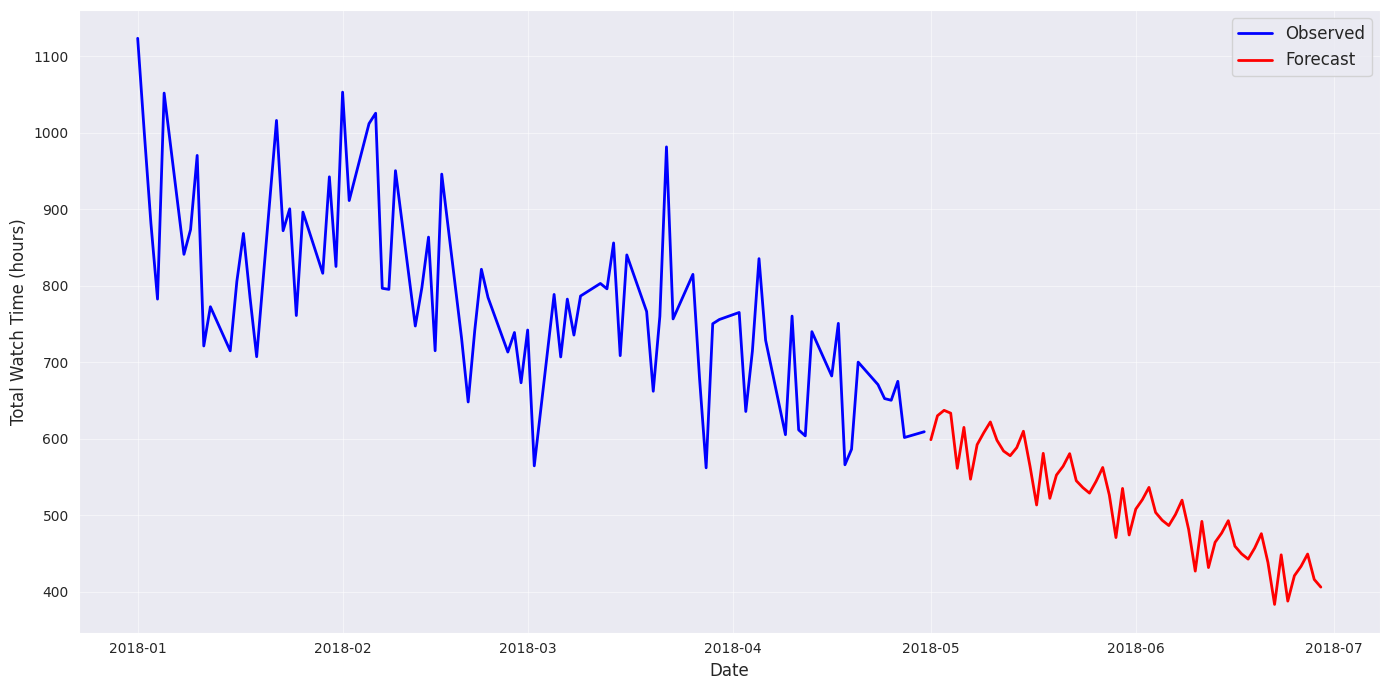

In [204]:
# Create a SARIMA model
p, d, q = 0, 1, 1
P, D, Q, m = 1, 1, 1, 12
sarima_model = SARIMAX(dataframe['Total_watch_time_in_houres'], order=(p, d, q), seasonal_order=(P, D, Q, m))
fitted_model = sarima_model.fit()


forecast = fitted_model.forecast(steps=60)


forecast_dates = pd.date_range(start='2018-05-01', periods=60)

forecast_df = pd.DataFrame({'date_': forecast_dates, 'Total_watch_time_in_houres': forecast})


concatenated_df = pd.concat([dataframe, forecast_df], ignore_index=True)



plt.figure(figsize=(14, 7))
plt.plot(concatenated_df.loc[concatenated_df['date_'] < '2018-05', 'date_'],
         concatenated_df.loc[concatenated_df['date_'] < '2018-05', 'Total_watch_time_in_houres'],
         label='Observed', color='blue', linewidth=2)
plt.plot(concatenated_df.loc[concatenated_df['date_'] >= '2018-05', 'date_'],
         concatenated_df.loc[concatenated_df['date_'] >= '2018-05', 'Total_watch_time_in_houres'],
         label='Forecast', color='red', linewidth=2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Watch Time (hours)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()